# Construção de modelo para prever o valor do aluguel

O dataset utilizado foi extraído do Kaggle (https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent). Possui 10962 casas para alugar com 13 classes diferentes.

Variáveis: 
    ; id
    ; city
    ; area
    ; rooms
    ; bathroom
    ; parking spaces
    ; floor
    ; animal (aceita animais?)
    ;furniture (mobiliada?)
    ; hoa (valor do condomínio)
    ; rent amount
    ; property tax
    ; fire insurance
    ; total
    

1- O Primeiro passo é realizar a extração e tratamento dos dados

In [8]:
# importação de pacotes
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# Conenctando no SQL Server para extrair a base
import pyodbc
conn =pyodbc.connect(driver='{SQL Server Native Client 11.0}', 
                      host='localhost', database='Aluguel_Casas_2', trusted_connection='yes')
cursor=conn.cursor()
cursor.execute('SELECT * FROM ALuguel_Casas_2.dbo.houses_to_rent_sql')


In [17]:
# importação de dados
dados=pd.read_sql(sql='SELECT * FROM ALuguel_Casas_2.dbo.houses_to_rent_sql',con=conn)

In [18]:
dados.head()

,Column 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,0,8000,1000,121,9121
1,1,0,64,2,1,1,10,acept,not furnished,540,820,122,11,1493
2,2,1,443,5,5,4,3,acept,furnished,4172,7000,1417,89,12680
3,3,1,73,2,2,1,12,acept,not furnished,700,1250,150,16,2116
4,4,1,19,1,1,0,-,not acept,not furnished,0,1200,41,16,1257


In [19]:
# amostra dos dados
dados.head()

,Column 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,0,8000,1000,121,9121
1,1,0,64,2,1,1,10,acept,not furnished,540,820,122,11,1493
2,2,1,443,5,5,4,3,acept,furnished,4172,7000,1417,89,12680
3,3,1,73,2,2,1,12,acept,not furnished,700,1250,150,16,2116
4,4,1,19,1,1,0,-,not acept,not furnished,0,1200,41,16,1257


In [20]:
# nome dos dados
dados.columns

Index(['Column 0', 'city', 'area', 'rooms', 'bathroom', 'parking spaces',
       'floor', 'animal', 'furniture', 'hoa', 'rent amount', 'property tax',
       'fire insurance', 'total'],
      dtype='object')

In [21]:
#tipo de dados
dados.dtypes

Column 0          object
city              object
area              object
rooms             object
bathroom          object
parking spaces    object
floor             object
animal            object
furniture         object
hoa               object
rent amount       object
property tax      object
fire insurance    object
total             object
dtype: object

In [22]:
# dimensão da base
dados.shape

(6080, 14)

In [23]:
#verificar se existe valor NA
dados.sum().isna()

Column 0          False
city              False
area              False
rooms             False
bathroom          False
parking spaces    False
floor             False
animal            False
furniture         False
hoa               False
rent amount       False
property tax      False
fire insurance    False
total             False
dtype: bool

In [24]:
# definir as variáveis categóricas e transformá-las
cat=['city', 'animal', 'furniture']

In [25]:
for i in cat:
    dados[i]=dados[i].astype("category")

In [26]:
dados.dtypes

Column 0            object
city              category
area                object
rooms               object
bathroom            object
parking spaces      object
floor               object
animal            category
furniture         category
hoa                 object
rent amount         object
property tax        object
fire insurance      object
total               object
dtype: object

In [46]:
# definir as variáveis numéricas e transformá-las
num=['hoa', 'rent amount', 'property tax','fire insurance', 'total', 'floor', 'area', 'rooms', 'bathroom', 'parking spaces']

In [28]:
from decimal import Decimal

In [29]:
# observa-se que em algumas variáveis contém o símbolo da moeda 'R$'. Portanto, é necessário fazer o tratamento para removê-las
dados['property tax']

0       1000
1        122
2       1417
3        150
4         41
        ... 
6075       0
6076      63
6077      42
6078     250
6079       0
Name: property tax, Length: 6080, dtype: object

In [30]:
for i in num:
    dados[i]=dados[i].str.replace(r'\D', '')

In [31]:
dados.total

0        9121
1        1493
2       12680
3        2116
4        1257
        ...  
6075     1585
6076     3768
6077     1255
6078     3803
6079     2414
Name: total, Length: 6080, dtype: object

In [32]:
for i in num:
    dados[i]=dados[i].str.replace(' ','')

In [33]:
dados[dados['property tax']==''].count()

Column 0          27
city              27
area              27
rooms             27
bathroom          27
parking spaces    27
floor             27
animal            27
furniture         27
hoa               27
rent amount       27
property tax      27
fire insurance    27
total             27
dtype: int64

In [34]:
dados[dados['hoa']==''].count()

Column 0          202
city              202
area              202
rooms             202
bathroom          202
parking spaces    202
floor             202
animal            202
furniture         202
hoa               202
rent amount       202
property tax      202
fire insurance    202
total             202
dtype: int64

In [35]:
dados[dados['floor']==''].count()

Column 0          1555
city              1555
area              1555
rooms             1555
bathroom          1555
parking spaces    1555
floor             1555
animal            1555
furniture         1555
hoa               1555
rent amount       1555
property tax      1555
fire insurance    1555
total             1555
dtype: int64

In [36]:
# Foi verificado valores em branco em algumas variáveis. Assim, foi optado para substituir esses valores por 0

In [37]:
dados['property tax']=dados['property tax'].replace('',0)

In [38]:
dados['floor']=dados['floor'].replace('',0)

In [39]:
dados['hoa']=dados['hoa'].replace('',0)

In [40]:
dados.isna().sum()

Column 0          0
city              0
area              0
rooms             0
bathroom          0
parking spaces    0
floor             0
animal            0
furniture         0
hoa               0
rent amount       0
property tax      0
fire insurance    0
total             0
dtype: int64

In [47]:
for i in num:
    dados[i]=dados[i].astype("int64")

In [48]:
dados.dtypes

Column 0            object
city              category
area                 int64
rooms                int64
bathroom             int64
parking spaces       int64
floor                int64
animal            category
furniture         category
hoa                  int64
rent amount          int64
property tax         int64
fire insurance       int64
total                int64
dtype: object

In [49]:
# eliminar a coluna 'Unnamed: 0'
dados=dados.drop(columns=['Column 0'])

2- Após a limpeza dos dados, a próxima tarefa é realiar uma análise exploratória da base

Analisar primeiro as variáveis numéricas

In [50]:
#Alguns indicadores estatísticos das variáveis numéricas
dados.describe()

,area,rooms,bathroom,parking spaces,floor,hoa,rent amount,property tax,fire insurance,total
count,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,151.143914,2.492599,2.341612,1.756250,5.672204,1088.426480,4395.844408,490.333388,58.204276,6033.194572
std,375.559485,1.129665,1.438860,1.611909,6.168918,3981.357627,3576.668946,6212.564538,49.313441,8751.347700
min,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,420.000000,0.000000,3.000000,660.000000
25%,58.000000,2.000000,1.000000,1.000000,0.000000,24.500000,1800.000000,33.000000,23.000000,2451.500000
50%,100.000000,3.000000,2.000000,1.000000,4.000000,650.000000,3111.000000,145.000000,41.000000,4128.500000
75%,200.000000,3.000000,3.000000,2.000000,9.000000,1436.000000,5952.500000,458.000000,77.000000,8074.000000
max,24606.000000,10.000000,10.000000,12.000000,99.000000,220000.000000,45000.000000,366300.000000,677.000000,372700.000000


In [51]:
import seaborn as sns

Text(0.5, 1.0, 'floor')

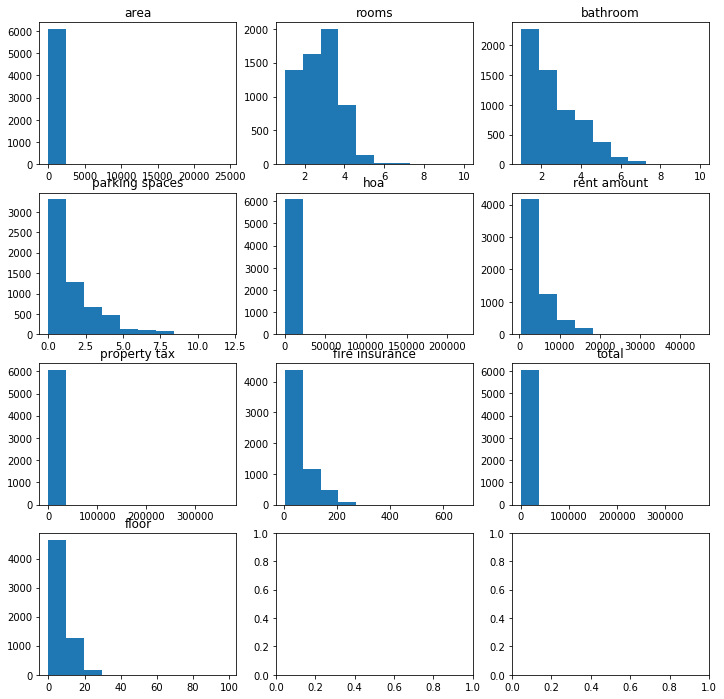

In [52]:
# Gráficos de histogramas das variáveis
fig, axs = plt.subplots(4, 3, figsize=(12,12))
axs[0,0].hist(dados['area'], )
axs[0,0].set_title('area')
axs[0,1].hist(dados['rooms'])
axs[0,1].set_title('rooms')
axs[0,2].hist(dados['bathroom'])
axs[0,2].set_title('bathroom')
axs[1,0].hist(dados['parking spaces'])
axs[1,0].set_title('parking spaces')
axs[1,1].hist(dados['hoa'])
axs[1,1].set_title('hoa')
axs[1,2].hist(dados['rent amount'])
axs[1,2].set_title('rent amount')
axs[2,0].hist(dados['property tax'])
axs[2,0].set_title('property tax')
axs[2,1].hist(dados['fire insurance'])
axs[2,1].set_title('fire insurance')
axs[2,2].hist(dados['total'])
axs[2,2].set_title('total')
axs[3,0].hist(dados['floor'])
axs[3,0].set_title('floor')


Text(0.5, 1.0, 'floor')

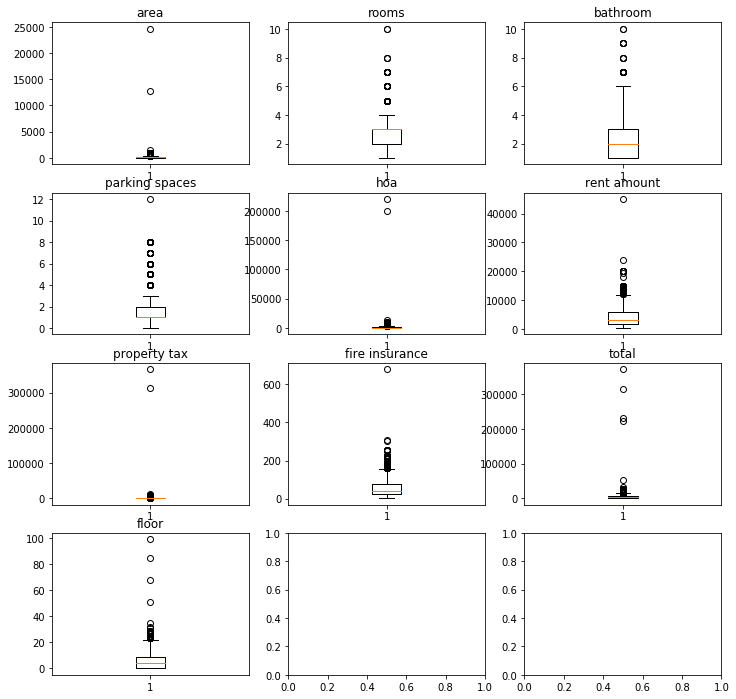

In [53]:
# Gráficos boxplot das variáveis

fig, axs = plt.subplots(4, 3, figsize=(12,12))
axs[0,0].boxplot(dados['area'])
axs[0,0].set_title('area')
axs[0,1].boxplot(dados['rooms'])
axs[0,1].set_title('rooms')
axs[0,2].boxplot(dados['bathroom'])
axs[0,2].set_title('bathroom')
axs[1,0].boxplot(dados['parking spaces'])
axs[1,0].set_title('parking spaces')
axs[1,1].boxplot(dados['hoa'])
axs[1,1].set_title('hoa')
axs[1,2].boxplot(dados['rent amount'])
axs[1,2].set_title('rent amount')
axs[2,0].boxplot(dados['property tax'])
axs[2,0].set_title('property tax')
axs[2,1].boxplot(dados['fire insurance'])
axs[2,1].set_title('fire insurance')
axs[2,2].boxplot(dados['total'])
axs[2,2].set_title('total')
axs[3,0].boxplot(dados['floor'])
axs[3,0].set_title('floor')

In [54]:
# Por meio dos gráficos Box-Plot nota-se que as variáveis numéricas apresentam outiliers

In [55]:
num1=['area','rooms','bathroom','parking spaces','hoa','rent amount','property tax','fire insurance', 'floor', 'total']               

In [56]:
import scipy
from scipy.stats import kurtosis, skew, shapiro

In [57]:
# skew >0 assimetria à direita, skew<0 assimetria à esquerda, skew=0 distr normal
for i in num1:
    print(i, skew(dados[i]))

area 51.69271263954538
rooms 0.5281396262541821
bathroom 1.0696587582163288
parking spaces 1.434304016367949
hoa 47.92175965539258
rent amount 1.640378028093375
property tax 54.67256754254887
fire insurance 1.7330128636400663
floor 2.1168615107661406
total 25.06411299943309


In [58]:
# Percebe-se que as variáveis não apresentam uma distribuição normal, elas possuem uma assimetria à esquerda

In [59]:
# kurt> 3 a distribuição em questão é mais alta (afunilada) e concentrada que a distribuição normal
# kurt<3 a função de distribuição é mais "achatada" que a distribuição normal
# kurt=3tem o mesmo achatamento que a distribuição normal.
for i in num1:
    print(i, kurtosis(dados[i]))

area 3162.25208589981
rooms 0.7612144546704211
bathroom 0.772112794860703
parking spaces 2.6815438903004614
hoa 2525.963412720937
rent amount 4.16067265816629
property tax 3037.6877648275013
fire insurance 5.559647861161572
floor 15.488323613172632
total 902.3637595938711


In [60]:
# Percebe-se que a maioria das variáveis apresentam distribuição dos dados mais alta que a distribuição normal

In [61]:
# Teste Shapiro-Wilk para verificar se as variáveis apresentam distribuição normal
for i in num1:
    print(i, shapiro(dados[i]))

area (0.13243097066879272, 0.0)
rooms (0.8931894302368164, 0.0)
bathroom (0.8395545482635498, 0.0)
parking spaces (0.8477415442466736, 0.0)
hoa (0.10939115285873413, 0.0)
rent amount (0.829047679901123, 0.0)
property tax (0.021265923976898193, 0.0)
fire insurance (0.8274679183959961, 0.0)
floor (0.8267875909805298, 0.0)
total (0.3210354447364807, 0.0)


C:\Users\allima\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [62]:
# De acordo com o teste de Shapiro-wilk os p-valor das vairáveis foram menor que 0.05, ou seja elas não possuem uma distribuição normal

In [63]:
# Analisar a correlação das variáveis numéricas
#Foi utilizado a carrelação de Spearman pois se adere melhor a varriáveis que não possuem uma distribuição normal
dados.corr(method='spearman')

,area,rooms,bathroom,parking spaces,floor,hoa,rent amount,property tax,fire insurance,total
area,1.000000,0.838729,0.829423,0.723015,-0.152723,0.242761,0.721228,0.675814,0.740797,0.739352
rooms,0.838729,1.000000,0.782932,0.668464,-0.107342,0.242120,0.592151,0.590749,0.607628,0.624033
bathroom,0.829423,0.782932,1.000000,0.714983,-0.031514,0.327563,0.709888,0.653637,0.710435,0.742714
parking spaces,0.723015,0.668464,0.714983,1.000000,-0.027613,0.274040,0.634330,0.618085,0.636643,0.666677
floor,-0.152723,-0.107342,-0.031514,-0.027613,1.000000,0.613904,0.073387,0.029465,-0.005572,0.170623
hoa,0.242761,0.242120,0.327563,0.274040,0.613904,1.000000,0.374161,0.374746,0.301014,0.540696
rent amount,0.721228,0.592151,0.709888,0.634330,0.073387,0.374161,1.000000,0.642280,0.970222,0.967697
property tax,0.675814,0.590749,0.653637,0.618085,0.029465,0.374746,0.642280,1.000000,0.656124,0.716029
fire insurance,0.740797,0.607628,0.710435,0.636643,-0.005572,0.301014,0.970222,0.656124,1.000000,0.930611
total,0.739352,0.624033,0.742714,0.666677,0.170623,0.540696,0.967697,0.716029,0.930611,1.000000


In [64]:
#analisar a quantidade de outliers na variável 'total'
import scipy as sc
iqr_total=sc.stats.iqr(dados['total'])

In [65]:
out1=9116.75+(1.5*iqr_total); out1

17550.5

In [66]:
out2=9116.75-(1.5*iqr_total); out2

683.0

In [67]:
x1=[]
for i in dados['total']:
    if i>out1:
        x1.append(i)
   

In [68]:
x2=[]
for i in dados['total']:
    if i<out2:
        x2.append(i)

In [69]:
print(len(x1+x2))
print(len(dados['total']))
print(len(x1+x2)/len(dados['total']))

194
6080
0.03190789473684211


In [70]:
#3% dos dados da variável 'total' são outliers

In [71]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
dados_num=dados[['hoa', 'rent amount', 'property tax', 'fire insurance', 'floor']]

In [73]:
# análise da multicolinearidade
vif_data = pd.DataFrame() 
vif_data["feature"] = dados_num.columns 
  

vif_data["VIF"] = [variance_inflation_factor(dados_num.values, i) 
                          for i in range(len(dados_num.columns))] 
  
print(vif_data)

          feature         VIF
0             hoa    1.144704
1     rent amount  109.486527
2    property tax    1.010085
3  fire insurance  102.221931
4           floor    1.749708


Observa-se que as variáveis rent amount e fire insurance apresentaram um VIF maior que 5, portanto pode-se afirmar que há multicolinariedade entre essas variáveis e a variável dependente 'total'. Assim, optou-se pela remoção dessas variáveis no modelo

In [74]:
dados1=dados.drop(columns=['rent amount', 'fire insurance'])

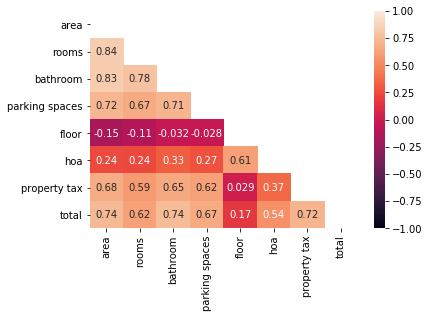

In [75]:
#Heatmap para analisar a correlação das variáveis
mask = np.triu(np.ones_like(dados1.corr(method='spearman'), dtype=bool))

# generate heatmap
sns.heatmap(dados1.corr(method='spearman'), annot=True, mask=mask, vmin=-1, vmax=1)

In [76]:
# No heatmap acima, percebe que algumas variáveis possuem um correlação forte com a variável dependente 'total',
#dado que apresentam uma correlação maior que 0.7, como a variável 'area', 'bathroom' e 'property tax'

Agora analisar as variáveis categóricas

In [77]:
cat=['city', 'animal','furniture']


In [78]:
# Contagem dos dados para cada grupo
for i in cat:
    print(dados.groupby([i])['total'].count())


city
0     831
1    5249
Name: total, dtype: int64
animal
acept        4666
not acept    1414
Name: total, dtype: int64
furniture
furnished        1582
not furnished    4498
Name: total, dtype: int64


In [79]:
# Média dos dados para cada grupo
for i in cat:
    print(dados.groupby([i])['total'].mean())

city
0    3354.521059
1    6457.271099
Name: total, dtype: float64
animal
acept        6193.374839
not acept    5504.622348
Name: total, dtype: float64
furniture
furnished        7464.603034
not furnished    5529.751223
Name: total, dtype: float64


In [80]:
for i in cat:
    print(dados.groupby([i])['total'].std())

city
0    2961.417481
1    9274.163738
Name: total, dtype: float64
animal
acept         6661.992277
not acept    13512.840415
Name: total, dtype: float64
furniture
furnished        11662.984758
not furnished     7398.103428
Name: total, dtype: float64


In [81]:
# Plotando os dados das mésidas dos grupos
df1=dados.groupby(['city'])['total'].mean()
df2=dados.groupby(['animal'])['total'].mean()
df3=dados.groupby(['furniture'])['total'].mean()

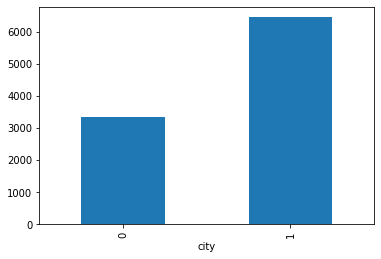

In [82]:
df1.plot.bar()

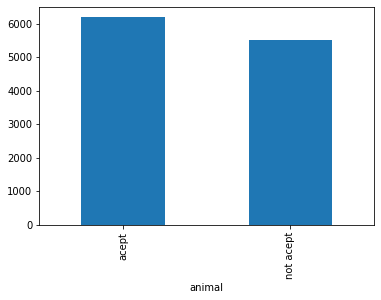

In [83]:
df2.plot.bar()

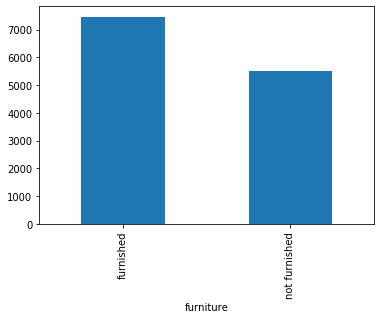

In [84]:
df3.plot.bar()

In [85]:
# Como pode ser visto nos gráficos, as casas que estão localizadas na cidade, aceitam animais ou são mobiliadas,
# possuem em média um aluguel maior

3- Após a análise exploratória o próximo procedimento é buscar o melhor modelo preditivo

In [86]:
# Transformando variáveis categóricas em dummies
dados2=pd.get_dummies(dados1)

In [87]:
dados2.head()

,area,rooms,bathroom,parking spaces,floor,hoa,property tax,total,city_0,city_1,animal_acept,animal_not acept,furniture_furnished,furniture_not furnished
0,240,3,3,4,0,0,1000,9121,0,1,1,0,1,0
1,64,2,1,1,10,540,122,1493,1,0,1,0,0,1
2,443,5,5,4,3,4172,1417,12680,0,1,1,0,1,0
3,73,2,2,1,12,700,150,2116,0,1,1,0,0,1
4,19,1,1,0,0,0,41,1257,0,1,0,1,0,1


In [88]:
# normalização dos dados
from sklearn.preprocessing import MinMaxScaler
import sklearn.feature_selection as ft

In [89]:
x=dados2.drop(columns=['total'])
y=dados2['total']

In [90]:
x_norm=MinMaxScaler(feature_range = (0, 1)).fit_transform(x)

In [91]:
x_norm

array([[0.00935111, 0.22222222, 0.22222222, ..., 0.        , 1.        ,
        0.        ],
       [0.00219548, 0.11111111, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.01760449, 0.44444444, 0.44444444, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.00154497, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.00609855, 0.22222222, 0.11111111, ..., 1.        , 0.        ,
        1.        ],
       [0.00203285, 0.11111111, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [92]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [93]:
# Forma de verificar quais são as variáveis mais relevantes ao modelo
best_var = SelectKBest(score_func = chi2)
fit = best_var.fit(x_norm, y)

In [94]:
print(x.columns)
print(fit.scores_)

Index(['area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'hoa',
       'property tax', 'city_0', 'city_1', 'animal_acept', 'animal_not acept',
       'furniture_furnished', 'furniture_not furnished'],
      dtype='object')
[ 242.87311983  478.01805758  918.09550359  618.19195771  294.41375999
  397.63634611 1305.01170934 3798.73888793  601.40065077 1003.43484443
 3311.19305808 3366.27904109 1183.96030302]


In [95]:
# divisão entre dados treino e teste
from sklearn.model_selection import train_test_split 

In [96]:
x_train, x_test, y_train, y_test=train_test_split(x_norm, y, test_size=0.33)

In [97]:
import statsmodels.api as sm

In [98]:
# modelo de Regressão Múltipla
modelo_Mult_Reg = sm.OLS(y_train,x_train, random_state=11).fit()
modelo_Mult_Reg.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     4617.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:08:22   Log-Likelihood:                -37691.
No. Observations:                4073   AIC:                         7.540e+04
Df Residuals:                    4062   BIC:                         7.547e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          7733.0087   2244.684      3.445      0.001    3332.198    1.21e+04
x2          2308.3135    499.583      4.620      0.000    1328.856    3287.771
x3          8597.4390    425.108     20.224      0.000    7763.995    9430.883
x4          6507.2334    418.785     15.538      0.000    5686.185    7328.282
x5          3520.3591    660.794      5.327      0.000    2224.841    4815.878
x6          2.333e+05   1847.793    126.273      0.000     2.3e+05    2.37e+05
x7          3.693e+05   2529.329    146.000      0.000    3.64e+05    3.74e+05
x8          -339.4590     77.590     -4.375      0.000    -491.578    -187.340
x9          1161.0420     53.148     21.846      0.000    1056.844    1265.240
x10          388.4043     52.778      7.359      0.000     284.930     491.879
x11          433.1786     60.793      7.125      0.000     313.990     552.367
x12          971.8068     62.393     15.576      0.000     849.483    1094.131
x13         -150.2239     48.236     -3.114      0.002    -244.792     -55.655
==============================================================================
Omnibus:                     1710.976   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21398.405
Skew:                           1.653   Prob(JB):                         0.00
Kurtosis:                      13.731   Cond. No.                     1.41e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.46e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [99]:
#Por meio dos dados acima, percebe-se que o p-valor dos coeficentes são menores que 0.05,
# ou seja, rejeita-se a hipotese nula de que a os coefiencientes são iguias a 0

In [100]:
# Prevendo o modelo e verificando sua acurácia
pred1=modelo_Mult_Reg.predict(x_test)

In [101]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [102]:
regression_results(y_test, pred1)

explained_variance:  0.9144
r2:  0.9143
MAE:  1706.6413
MSE:  6140747.3998
RMSE:  2478.0531


In [103]:
# Modelo Random Forest 
from sklearn.ensemble import RandomForestRegressor

In [104]:
modelo_rf=RandomForestRegressor(random_state=111)

In [105]:
modelo_rf.fit(x_train,y_train)

RandomForestRegressor(random_state=111)

In [106]:
#Outro modo de verficar as variáveis mais relavantes
print(x.columns)
print(modelo_rf.feature_importances_)

Index(['area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'hoa',
       'property tax', 'city_0', 'city_1', 'animal_acept', 'animal_not acept',
       'furniture_furnished', 'furniture_not furnished'],
      dtype='object')
[0.02999343 0.00586973 0.00950755 0.00671026 0.01172974 0.39071373
 0.53540556 0.00084418 0.00087444 0.00150445 0.00137183 0.00265846
 0.00281664]


In [107]:
pred2=modelo_rf.predict(x_test)

In [108]:
regression_results(y_test, pred2)

explained_variance:  0.8967
r2:  0.8967
MAE:  1496.5981
MSE:  7401556.7027
RMSE:  2720.5802


In [109]:
from sklearn.ensemble import GradientBoostingRegressor

In [119]:
# Modelo Gradient Boosting Regressor
modelo_gb=GradientBoostingRegressor(random_state=22)

In [120]:
modelo_gb.fit(x_train,y_train)

GradientBoostingRegressor(random_state=22)

In [121]:
pred3=modelo_gb.predict(x_test)

In [122]:
regression_results(y_test, pred3)

explained_variance:  0.9083
r2:  0.9083
MAE:  1526.2265
MSE:  6571000.298
RMSE:  2563.3962


In [123]:
from xgboost import XGBRegressor

In [141]:
# Modelo XGB Regressor
modelo_xgb=XGBRegressor(random_state=35)

In [142]:
modelo_xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=35,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [143]:
pred4=modelo_xgb.predict(x_test)

In [144]:
regression_results(y_test, pred4)

explained_variance:  0.8898
r2:  0.8898
MAE:  1552.4352
MSE:  7894328.4028
RMSE:  2809.6848


Após realizar 4 modelos, percebe-se que o modelo que utilizou o algoritmo Gradient Bossting Regressor apresentou o melhor resultado

Técnica de grid search para verificar os melhores hiperparâmetros


In [128]:
#parâmetros a serem analisados
param_grid = {
              "learning_rate" : [0.03,0.05, 0.1, 0.25, 0.5],
             'n_estimators': [100,200]}

In [129]:
from sklearn.model_selection import GridSearchCV

In [148]:
grid_search = GridSearchCV(modelo_xgb, param_grid = param_grid, return_train_score = True)

In [149]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=0,
                                    num_parallel_tree=1, random_state=35,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             param_grid=

In [150]:
grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=35,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [151]:
modelo_xgb2=XGBRegressor(
             learning_rate=0.03, 
             n_estimators=200,  random_state=44)

In [152]:
modelo_xgb2.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=44,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [153]:
pred5=modelo_xgb2.predict(x_test)

In [154]:
regression_results(y_test,pred5)

explained_variance:  0.9164
r2:  0.9164
MAE:  1500.7493
MSE:  5990467.585
RMSE:  2447.5432


Salvando o melhor modelo

In [156]:
import pickle

In [157]:
with open('modelo_aluguel_v2.pkl', 'wb') as file:
    pickle.dump(modelo_xgb2, file)

Conclusão: Após analisar os modelos e fazer o gridsearch, optou-se por utilizar o modelo_xb2 para a previsão do valor do aluguel